<a href="https://colab.research.google.com/github/adkprakash/sentiment_analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [7]:
from nltk.corpus import stopwords

In [8]:
from google.colab import drive

In [5]:
# Mount your Google Drive (authorization required)
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Path to your CSV file in Google Drive
data_path='drive/My Drive/Dataset'

In [10]:
# Read the CSV file using pandas
data = pd.read_csv(data_path+'/netflix_reviews.csv')

In [11]:
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,d123acad-4c26-41c2-97b0-592f46758853,Nikshia Bhaiwa,This is amazing app,5,0,8.114.0 build 19 50680,2024-05-18 23:04:55,8.114.0 build 19 50680
1,3370bed7-4d52-4e14-b9b8-0282138b708e,Pilot Seleam,"Unsubscribing ! , now i cant open it on my oth...",1,0,8.114.0 build 19 50680,2024-05-18 22:41:23,8.114.0 build 19 50680
2,87bc75a8-81b9-4220-8843-05d0d58f154e,nomthandazo patience,I've been trying to install this app it doesn'...,1,0,8.101.1 build 7 50601,2024-05-18 22:37:34,8.101.1 build 7 50601
3,2cb4ce60-ba5a-4a8b-b878-3df7e41d1b02,Eseme Kelly,Great App 🔥,5,0,8.108.0 build 2 50642,2024-05-18 22:33:34,8.108.0 build 2 50642
4,9ebc48ff-a622-45e8-a3b3-881f612fd016,Eitan Craft24,No me dejaba ver nada porque no estaba en mi casa,1,0,8.114.0 build 19 50680,2024-05-18 21:59:12,8.114.0 build 19 50680


In [12]:
# Dropping unwanted column by name
drop_column=['reviewId','userName','reviewCreatedVersion','at','appVersion']
data = data.drop(drop_column, axis=1)

In [13]:
data.head()

,content,score,thumbsUpCount
0,This is amazing app,5,0
1,"Unsubscribing ! , now i cant open it on my oth...",1,0
2,I've been trying to install this app it doesn'...,1,0
3,Great App 🔥,5,0
4,No me dejaba ver nada porque no estaba en mi casa,1,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109211 entries, 0 to 109210
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   content        109211 non-null  object
 1   score          109211 non-null  int64 
 2   thumbsUpCount  109211 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


In [15]:
data['score'].value_counts()

score
1    42775
5    30635
4    13576
3    11698
2    10527
Name: count, dtype: int64

<Axes: xlabel='score', ylabel='count'>

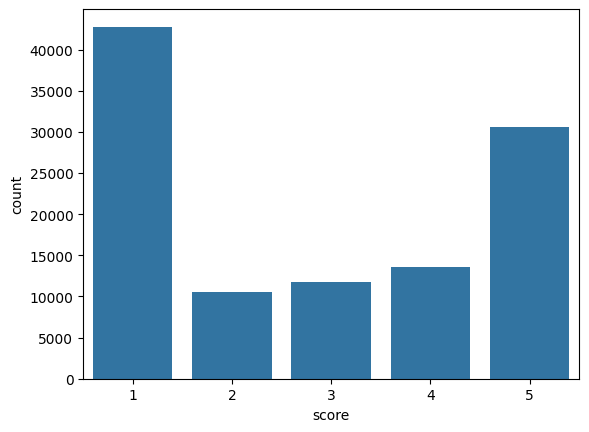

In [16]:
sns.countplot(x='score',data=data)

In [17]:
# Count unique values
num_unique_values = data['thumbsUpCount'].nunique()

# Print the result
print(f"Number of unique values in 'thumbsUpCount': {num_unique_values}")

Number of unique values in 'thumbsUpCount': 899


In [18]:
data['thumbsUpCount'].describe()

count    109211.000000
mean         10.798473
std         102.097338
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        8032.000000
Name: thumbsUpCount, dtype: float64

In [19]:
data['thumbsUpCount'].mean()

10.79847268132331

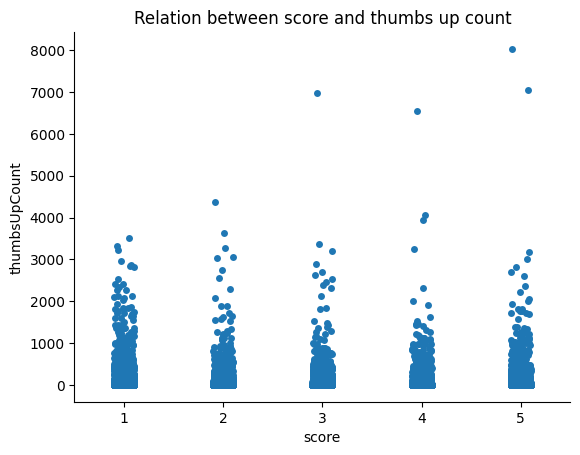

In [20]:
# Creating a strip plot
sns.stripplot(
    x = "score",
    y = "thumbsUpCount",
    data=data
)

# Customize the plot
sns.despine()  # Remove grid lines for cleaner visuals
plt.title("Relation between score and thumbs up count")  # Add a title

# Display the plot
plt.show()


In [21]:
# Setting a threshold score to separate positive and negative reviews
threshold = 3

def convert_to_review(score):
  if score < threshold:
    return "negative"
  else:
    return "positive"

# Applying the conversion function to the "score" column
data['score'] = data['score'].apply(convert_to_review)

In [22]:
data['score'].value_counts()

score
positive    55909
negative    53302
Name: count, dtype: int64

In [23]:
data.head()

,content,score,thumbsUpCount
0,This is amazing app,positive,0
1,"Unsubscribing ! , now i cant open it on my oth...",negative,0
2,I've been trying to install this app it doesn'...,negative,0
3,Great App 🔥,positive,0
4,No me dejaba ver nada porque no estaba en mi casa,negative,0


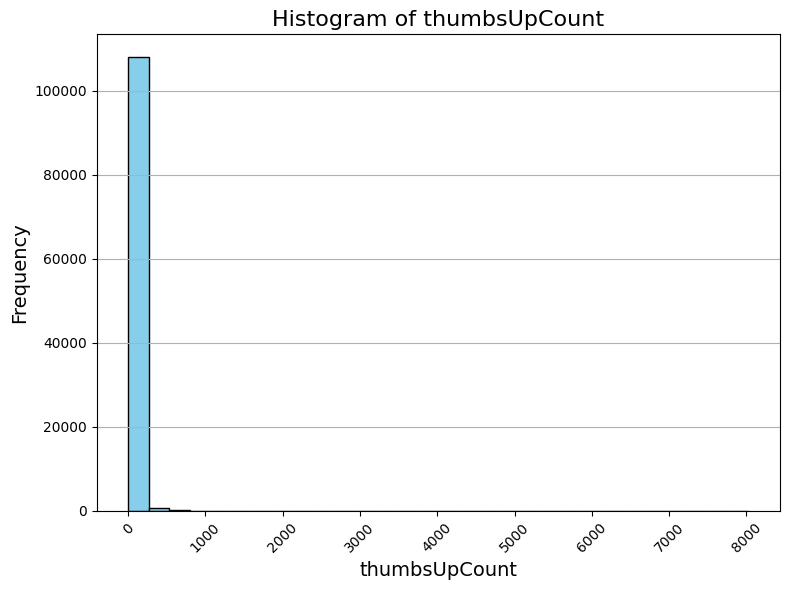

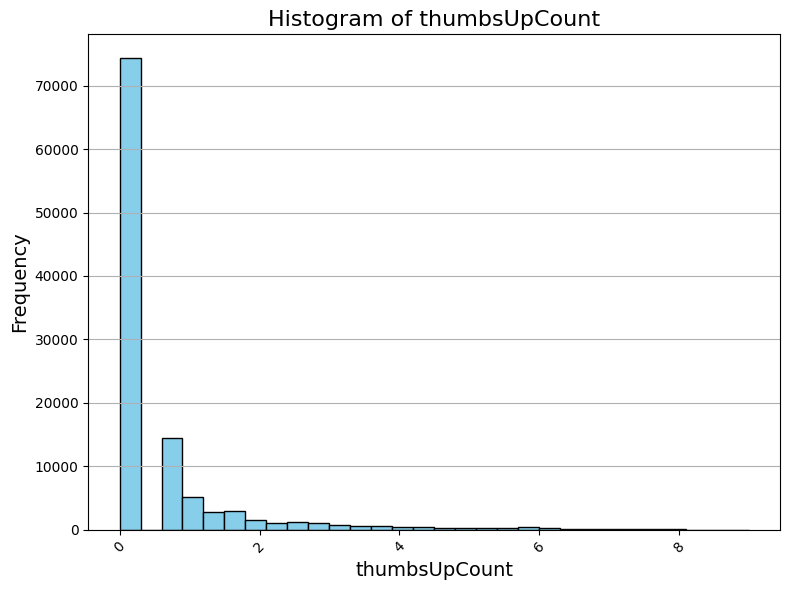

In [24]:
# Creating a hsitogram of thumbsUpCount
plt.figure(figsize=(8,6))
plt.hist(data['thumbsUpCount'], bins=30 ,color='skyblue',edgecolor='black')
plt.title(f'Histogram of thumbsUpCount',fontsize=16)
plt.xlabel('thumbsUpCount',fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Creating a hsitogram of thumbsUpCount after normalization using log
plt.figure(figsize=(8,6))
plt.hist(np.log(data['thumbsUpCount']+1), bins=30 ,color='skyblue',edgecolor='black')
plt.title(f'Histogram of thumbsUpCount',fontsize=16)
plt.xlabel('thumbsUpCount',fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text Preprocessing

In [25]:
# Text Normalizaton
# Installing contractions library for Expanding Contractions
!pip install contractions

#Importing contractions library
import contractions
# Defining a function to expand contractions
def expand_contractions(text):
    try:
        return contractions.fix(text)
    except Exception as e:
        # Handle the exception
        return text

# Applying the function to the 'content' column using apply
data['content'] = data['content'].apply(expand_contractions)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.1 MB/s eta 0:00:00


In [26]:
data.head()

,content,score,thumbsUpCount
0,This is amazing app,positive,0
1,"Unsubscribing ! , now i cannot open it on my o...",negative,0
2,I have been trying to install this app it does...,negative,0
3,Great App 🔥,positive,0
4,No me dejaba ver nada porque no estaba en mi casa,negative,0


In [27]:
# Lowercase the 'content' column
data['content'] = data['content'].str.lower()

In [28]:
data.head()

,content,score,thumbsUpCount
0,this is amazing app,positive,0
1,"unsubscribing ! , now i cannot open it on my o...",negative,0
2,i have been trying to install this app it does...,negative,0
3,great app 🔥,positive,0
4,no me dejaba ver nada porque no estaba en mi casa,negative,0


In [29]:
import string
# Define function to remove punctuation
def remove_punctuation(text):

  punctuation = string.punctuation
  return ''.join([char for char in text if char not in punctuation])

# Apply the function to the 'content' column (vectorized)
data['content'] = data['content'].apply(remove_punctuation)

In [30]:
data.head()

,content,score,thumbsUpCount
0,this is amazing app,positive,0
1,unsubscribing now i cannot open it on my oth...,negative,0
2,i have been trying to install this app it does...,negative,0
3,great app 🔥,positive,0
4,no me dejaba ver nada porque no estaba en mi casa,negative,0


In [31]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [32]:
# Defining function to perform lemmatization
def lemmatize_text(text):

  lemmatizer = WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word) for word in text.lower().split()]
  return ' '.join(words)

# Apply the function to the 'content' column (vectorized)
data['content'] = data['content'].apply(lemmatize_text)

In [33]:
data.head()

,content,score,thumbsUpCount
0,this is amazing app,positive,0
1,unsubscribing now i cannot open it on my other...,negative,0
2,i have been trying to install this app it doe ...,negative,0
3,great app 🔥,positive,0
4,no me dejaba ver nada porque no estaba en mi casa,negative,0


In [34]:
from wordcloud import WordCloud

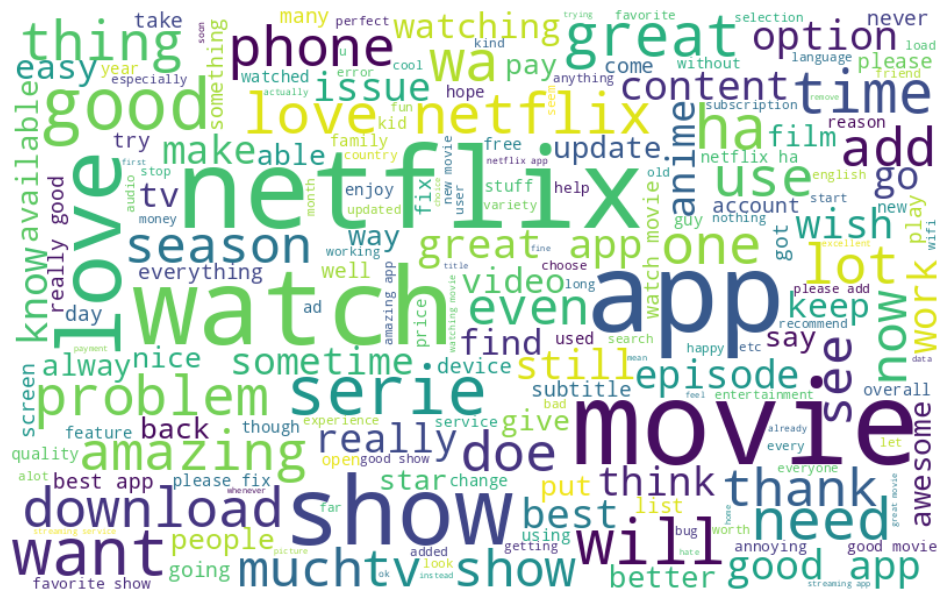

In [35]:
reviews= ' '.join(words for words in data['content'][data['score']== 'positive'].astype(str))
worldcloud= WordCloud(width=800,height=500,max_font_size=100,background_color='white').generate(reviews)
plt.figure(figsize=(12,10))
plt.imshow(worldcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

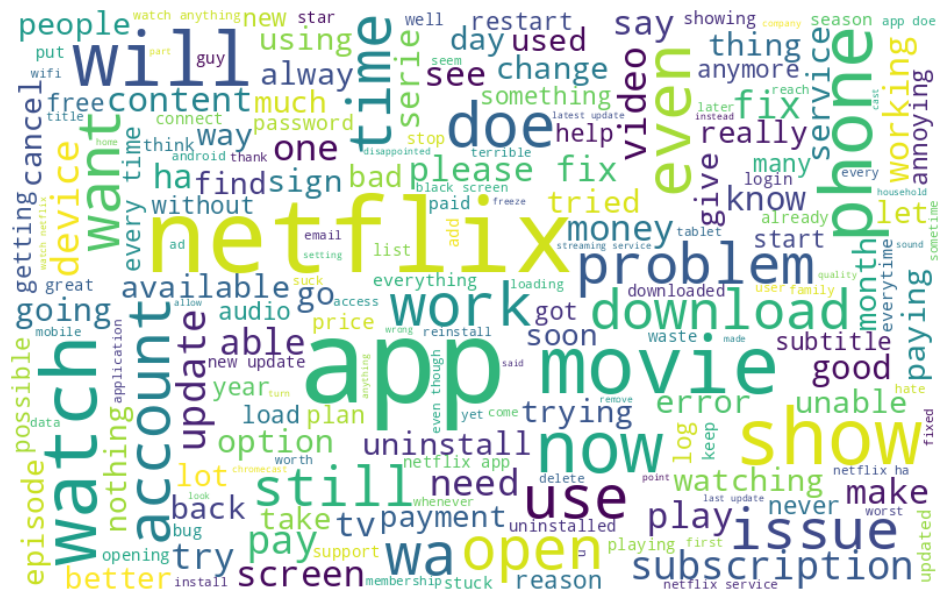

In [36]:
reviews= ' '.join(words for words in data['content'][data['score']== 'negative'].astype(str))
worldcloud= WordCloud(width=800,height=500,max_font_size=100,background_color='white').generate(reviews)
plt.figure(figsize=(12,10))
plt.imshow(worldcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
data.head()

,content,score,thumbsUpCount
0,this is amazing app,positive,0
1,unsubscribing now i cannot open it on my other...,negative,0
2,i have been trying to install this app it doe ...,negative,0
3,great app 🔥,positive,0
4,no me dejaba ver nada porque no estaba en mi casa,negative,0


In [38]:
# Downloading the punkt tokenizer (one-time download)
nltk.download('punkt')

def tokenize_text(text):

  tokens = nltk.word_tokenize(text)
  return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [39]:
# Apply the function to the 'content' column (vectorized)
data['content'] = data['content'].apply(tokenize_text)

In [40]:
data.head()

,content,score,thumbsUpCount
0,"[this, is, amazing, app]",positive,0
1,"[unsubscribing, now, i, can, not, open, it, on...",negative,0
2,"[i, have, been, trying, to, install, this, app...",negative,0
3,"[great, app, 🔥]",positive,0
4,"[no, me, dejaba, ver, nada, porque, no, estaba...",negative,0


In [41]:
data['content'].str.len()

0          4
1         14
2         13
3          3
4         11
          ..
109206    15
109207    10
109208     7
109209    16
109210    12
Name: content, Length: 109211, dtype: int64

In [42]:
#import Word2vec from gensim library
from gensim.models.word2vec import Word2Vec

In [43]:
text_corpus = data['content'].tolist() # Converting to list of lists

In [44]:
# Training the word2vec model
embedding_model = Word2Vec(text_corpus, min_count=1, window=10, vector_size=500, sg=1)  # sg=1 for skip-gram

In [45]:
#Getting word embeddings and similar words
word = "happy"
word_vector = embedding_model.wv[word]  # Get vector for a specific word
similar_words = embedding_model.wv.most_similar(word, topn=5)
print(f"Similar words to '{word}': {similar_words}")

Similar words to 'happy': [('satisfied', 0.6983931064605713), ('pleased', 0.6573078036308289), ('upset', 0.642846941947937), ('obsessed', 0.6383669376373291), ('impressed', 0.6381433606147766)]


In [46]:
#Saving the model for later use
#Saving in google drive
#embedding_model.save("drive/My Drive/Dataset/sentiment_analysis_model.bin")  # Saving in binary format

In [47]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
# Load your preprocessed DataFrame 'content' is the text column, 'score' is the targeted column
content = data['content'].tolist()


In [49]:
# Defining maximum vocabulary size and sequence length
max_features = 52680 # Adjusting this based on your vocabulary size
maxlen = 100  # Adjusting this based on your average sentence length


In [50]:
# Tokenizer for converting text to sequences of integers
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(content)
content_sequences = tokenizer.texts_to_sequences(content)

In [51]:
# Padding sequences to a fixed length
content_padded = pad_sequences(content_sequences, maxlen=maxlen, padding='post')

In [52]:
# Loading Pre-trained Word Embeddings from Google Drive
word_embedding_path = 'drive/My Drive/Dataset/sentiment_analysis_model.bin'
embedding_dim = 500

In [53]:
def convert_sentiment_to_numerical(sentiment_text):
  #Converts a text sentiment label ("positive" or "negative") to a numerical value.


  if sentiment_text == "positive":
    return 1
  elif sentiment_text == "negative":
    return 0



In [54]:
# Apply the conversion function to the 'score' column using apply
data['score'] = data['score'].apply(convert_sentiment_to_numerical)

In [55]:
data.head()

,content,score,thumbsUpCount
0,"[this, is, amazing, app]",1,0
1,"[unsubscribing, now, i, can, not, open, it, on...",0,0
2,"[i, have, been, trying, to, install, this, app...",0,0
3,"[great, app, 🔥]",1,0
4,"[no, me, dejaba, ver, nada, porque, no, estaba...",0,0


In [56]:
features = data['score']

In [57]:
def load_word_embeddings(embedding_model, embedding_dim):

  # Get the vocabulary from the loaded model
  vocabulary = list(embedding_model.wv.key_to_index)

  # Create the embedding matrix with zeros
  embedding_matrix = np.zeros((len(vocabulary), embedding_dim))

  # Fill the embedding matrix with word vectors from the model
  for i, word in enumerate(vocabulary):
    if word in embedding_model.wv:  # Check if word exists in the model's vocabulary
      embedding_matrix[i] = embedding_model.wv[word]

  return embedding_matrix

In [58]:
# Load word embeddings using the function
embedding_matrix = load_word_embeddings(embedding_model, embedding_dim)

In [59]:
# Defining the LSTM Model
model = Sequential()
model.add(Embedding(max_features, embedding_dim, weights=[embedding_matrix], trainable=False))  # Text feature
model.add(LSTM(64, return_sequences=True,dropout=0.2, recurrent_dropout=0.2))  # 64 hidden units, return sequences for next LSTM layer
model.add(LSTM(32,dropout=0.2, recurrent_dropout=0.2))  # 32 hidden units in the second LSTM layer
model.add(Dense(1, activation='sigmoid')) #Output layer, Sigmoid for binary classification

In [60]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [61]:
# Train the model
history=model.fit(content_padded,features, epochs=30, batch_size=45, validation_split=0.3,callbacks=[early_stopping])

Epoch 1/30
1699/1699 [==============================] - 987s 576ms/step - loss: 0.6910 - accuracy: 0.5302 - val_loss: 0.7024 - val_accuracy: 0.3844
Epoch 2/30
1699/1699 [==============================] - 1010s 594ms/step - loss: 0.6068 - accuracy: 0.6537 - val_loss: 0.4034 - val_accuracy: 0.8249
Epoch 3/30
1699/1699 [==============================] - 1006s 592ms/step - loss: 0.4519 - accuracy: 0.7983 - val_loss: 0.3565 - val_accuracy: 0.8452
Epoch 4/30
1699/1699 [==============================] - 1001s 589ms/step - loss: 0.4172 - accuracy: 0.8171 - val_loss: 0.3453 - val_accuracy: 0.8507
Epoch 5/30
1699/1699 [==============================] - 1005s 592ms/step - loss: 0.3958 - accuracy: 0.8279 - val_loss: 0.3287 - val_accuracy: 0.8590
Epoch 6/30
1699/1699 [==============================] - 999s 588ms/step - loss: 0.3820 - accuracy: 0.8338 - val_loss: 0.3354 - val_accuracy: 0.8578
Epoch 7/30
1699/1699 [==============================] - 960s 565ms/step - loss: 0.3723 - accuracy: 0.8395 - 

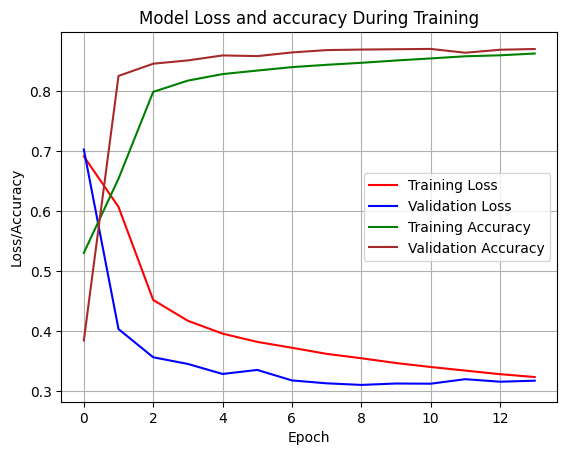

In [62]:
# Accessing training loss and accuracy
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Accessing validation loss and accuracy
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


# Create the plot
plt.plot(train_loss, label='Training Loss',color='red')
plt.plot(val_loss, label='Validation Loss',color='blue')
plt.plot(train_accuracy, label='Training Accuracy',color='green')
plt.plot(val_accuracy, label='Validation Accuracy',color='brown')

# Customize the plot
plt.title('Model Loss and accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')  # Adjusted label for combined plot
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [63]:
import pickle
# Define filename for the pickle file
filename = 'drive/My Drive/Dataset/sentiment_analysis_model.pkl'

# Open the file in binary write mode
with open(filename, 'wb') as file:
    # Pickle the model (using highest protocol version for compatibility)
    pickle.dump(model, file, pickle.HIGHEST_PROTOCOL)

print(f'Model saved to pickle file: {filename}')

Model saved to pickle file: drive/My Drive/Dataset/sentiment_analysis_model.pkl


In [64]:
# Testing a model with new data

In [124]:
new_data=" movie is awesome"

In [125]:
new_data = expand_contractions(new_data) #calling the function of expand contraction
new_data = new_data.lower() #converting the characters in data into lowercase
new_data = remove_punctuation(new_data) #removing punctuation form text by calling the function
new_data = lemmatize_text(new_data) #lemmatization
new_data = tokenize_text(new_data)#tokenization

In [126]:
print(new_data)

['movie', 'is', 'awesome']


In [127]:
def find_max_length(data):

  max_len = 0
  for sequence in data:
    sequence_len = len(sequence)
    max_len = max(max_len, sequence_len)

  return max_len

In [128]:
#  maximum sequence length for model
max_len = find_max_length(new_data)

In [129]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def convert_to_sequence(text, word2vec_model, max_len, unknown_embedding_vector=np.zeros(100)):

  #Converts preprocessed text to a sequence of integers, handling unknown words with a default vector.

  sequence = []
  for word in text:
    if word2vec_model is not None and word in word2vec_model.wv:
      sequence.append(word2vec_model.wv[word])
    else:
      sequence.append(unknown_embedding_vector)

  # Pad the sequence if necessary
  padded_sequence = pad_sequences([sequence], maxlen=max_len)

  return padded_sequence.squeeze(axis=0)

In [130]:
# Convert the preprocessed text to a sequence
sequence = convert_to_sequence(new_data, embedding_model, max_len)

In [131]:
# Prepare the input for the model
if sequence is not None:
  model_input = sequence

# Make predictions
predictions = model.predict(model_input)

1/1 [==============================] - 0s 170ms/step


In [132]:
print(predictions.shape)

(7, 1)


In [133]:
if len(predictions.shape) > 1 and predictions.shape[-1] == 1:  # Single output with sigmoid
  sentiment = "Positive" if predictions[0][0] > 0.5 else "Negative"
  print(f"Predicted sentiment: {sentiment} (confidence: {predictions[0][0]:.2f})")
else:
  print("Error: Unexpected output format. Ensure model uses sigmoid activation with single output.")

Predicted sentiment: Negative (confidence: 0.17)
